# Практическое задание №5

- Вариант для проверки однородности двух независимых выборок: зависимая переменная - SBP.1, группириующая переменная - irritability.1
- Вариант для проверки однородности трех независимых выборок: зависимая переменная - HR.1,  перва группириующая переменная - craving.to.alcohol.1, вторая группирующая переменная - произвольная категориальная переменная 

- Задача однородности в случае двух выборок (табл. Варианты для проверки однородности двух независимых выборок). При наличии трех градаций нужно объединить ячейки, чтобы получить две наиболее представленные градации. Проверить на предмет однородности независимых выборок метрическую переменную (столбцы таблицы) в зависимости от категориальной переменной (строки таблицы) по критерию 1) Вилкоксона, 2) Фишера равенства дисперсий, 3) Стьюдента равенства средних. Привести значения средних с ошибками среднего, медиан с интерквартильным размахом, значимости соответствующих критериев.
- Задача однородности в случае более двух выборок (табл. Варианты для проверки однородности трех независимых выборок) Проверить на предмет однородности данные метрической переменной в зависимости от фактора: 1) по критерию Краскела-Уоллиса, 2) при помощи однофакторного дисперсионного анализа. Построить бокс-плот. Применить критерий Стьюдента для множественных сравнений с поправкой Бонферони и критерий Тьюки.
- Выполнить двухфакторный дисперсионный анализ для метрической переменной с двумя факторами (первый из своего варианта, второй произвольный). Сравнить результаты использования моделей с фиксированными и случайными эффектами.

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

Считаем данные:

In [3]:
df = pd.read_csv("data_big.csv")

In [12]:
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


## Задача однородности в случае двух выборок

Сгруппируем переменную SBP.1 по переменной irritability.1

In [13]:
df.groupby("irritability.1")["SBP.1"].count()

irritability.1
0    21
1    12
2     1
Name: SBP.1, dtype: int64

Объеденим градации

In [14]:
df["irritability.1"] = [0 if x < 1 else 1 for x in df["irritability.1"]]

Создадаим две выборки на основе категориальной перменной

In [15]:
sample1 = df[df["irritability.1"] == 0]["SBP.1"]
sample2 = df[df["irritability.1"] == 1]["SBP.1"]

Критерий Вилкоксона

In [16]:
_, p_w = scipy.stats.ranksums(sample1, sample2)

Критерий Фишера равенства дисперсий

In [18]:
_, p_f = scipy.stats.f_oneway(sample1, sample2)

Критерий Стьюдента равенства средних

In [21]:
_, p_t = scipy.stats.ttest_ind(sample1, sample2)

In [24]:
print(f'Критерий Вилкоксона: p-value = {p_w}')
print(f'Критерий Фишера: p-value = {p_f}')
print(f'Критерий Стьюдента: p-value = {p_t}')

Критерий Вилкоксона: p-value = 0.6577793366559057
Критерий Фишера: p-value = 0.6365847115986595
Критерий Стьюдента: p-value = 0.6365847115986625


Так как p уровень значимости во всех случаях больше 0.05, то гипотеза об однородности выборок не может быть отвергнута.

Выведем значения средних с ошибками среднего, медиан с интерквартильным размахом

In [27]:
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

se1 = np.std(sample1, ddof=1) / np.sqrt(len(sample1))
se2 = np.std(sample2, ddof=1) / np.sqrt(len(sample2))

median1 = np.median(sample1)
median2 = np.median(sample2)

iqr1 = scipy.stats.iqr(sample1)
iqr2 = scipy.stats.iqr(sample2)

In [28]:
print(f'Среднее первой группы {mean1}+-{se1}')
print(f'Среднее второй группы {mean2}+-{se2}')

Среднее первой группы 142.76190476190476+-3.398812651153594
Среднее второй группы 139.84615384615384+-5.5166951202064505


In [29]:
print(f'Медиана первой группы {median1} с интерквантильным размахом {iqr1}')
print(f'Медиана второй группы {median2} с интерквантильным размахом {iqr2}')

Медиана первой группы 144.0 с интерквантильным размахом 22.0
Медиана второй группы 140.0 с интерквантильным размахом 36.0


## Задача однородности в случае более двух выборок

In [4]:
df["craving.to.alcohol.1"].unique()

array([1, 0, 2])

In [5]:
samples = [df[df["craving.to.alcohol.1"] == i]["HR.1"] for i in df["craving.to.alcohol.1"].unique()]

Критерий Краскела-Уоллиса

In [34]:
_, p_kw = scipy.stats.kruskal(samples[0], samples[1], samples[2])

In [35]:
print(f"Критерий Краскела-Уоллиса: p_value = {p_kw}")

Критерий Краскела-Уоллиса: p_value = 0.013658667170609904


P уровень значимости меньше 0.05, значит гипотеза о различных распределениях отвергается

Однофакторный дисперсионный анализ

In [36]:
_, p_aov = scipy.stats.f_oneway(samples[0], samples[1], samples[2])

In [37]:
print(f"Однофакторный дисперсионный анализ: p_value = {p_aov}")

Однофакторный дисперсионный анализ: p_value = 0.014703465302439333


P уровень значимости меньше 0.05, значит гипотеза о том, что между группами нет значимых различий отвергается

Боксплот

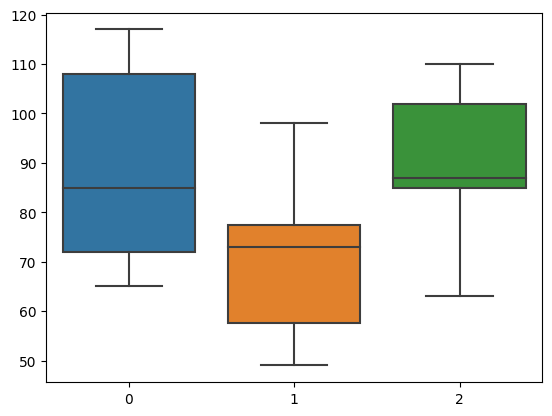

In [39]:
sns.boxplot(samples);

Критерий Стьюдента для множественных сравнений с поправкой Бонферони

In [42]:
alpha = 0.05 / 3 # поправка Бонферони
p_values = []

for i in range(3):
    for j in range(i+1, 3):
        _, p_value = scipy.stats.ttest_ind(samples[i], samples[j])
        if p_value < alpha:
            print(f"Выборки {i+1} и {j+1} значимо различаются")
        p_values.append(p_value)

Выборки 1 и 2 значимо различаются


Критерий Тьюки

In [47]:
p_tukey = scipy.stats.tukey_hsd(samples[0], samples[1], samples[2]).pvalue

In [48]:
print(p_tukey)

[[1.         0.018007   0.98179562]
 [0.018007   1.         0.08161527]
 [0.98179562 0.08161527 1.        ]]


Можно сделать вывод о том, что группы 1 и 2 значимо различаются, а группы 1 и 3, а также группы 2 и 3 не различаются. Результат совпадает с тестом Стьюдента.

## Двухфакторный дисперсионный анализ

In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [7]:
data = pd.DataFrame({"HR": df["HR.1"], "irritability": df["irritability.1"], "craving": df["craving.to.alcohol.1"]})

Двухфакторный анализ с фиксированными эффектами

In [29]:
model = ols("HR ~ C(irritability) + C(craving) + C(irritability) * C(craving)", data).fit()
anova_table = anova_lm(model)
print(anova_table)

                              df       sum_sq     mean_sq         F    PR(>F)
C(irritability)              2.0  1545.654062  772.827031  2.835220  0.076264
C(craving)                   2.0  1739.310097  869.655048  3.190447  0.057041
C(irritability):C(craving)   4.0  1959.302421  489.825605  1.796991  0.158587
Residual                    27.0  7359.686508  272.580982       NaN       NaN


Двухфакторный анализ со случайными эффектами

In [27]:
model_random = ols("HR ~ C(irritability) + C(craving)", data).fit()
anova_table_random = anova_lm(model_random)
print(anova_table_random)

                   df       sum_sq     mean_sq         F    PR(>F)
C(irritability)   2.0  1545.654062  772.827031  2.958055  0.067748
C(craving)        2.0  1739.310097  869.655048  3.328672  0.049959
Residual         29.0  7576.594665  261.261885       NaN       NaN


Фактор "craving" оказывает значимое влияние на зависимую переменную в модели со случайными эффектами, в то время как фактор "irritability" не оказывает статистически значимого влияния в обеих моделях.